In [1]:
# Import the dependencies.
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import requests
from citipy import citipy
from config import weather_api_key

In [2]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [3]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [4]:
# Use the print() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

-34.94501551430887 95.15836434112737
35.70294679497934 156.85224671303916
-15.293221185890474 148.73748590172096
-68.18021939756116 -21.792362271473706
-20.323851023955655 56.18195972789917
-50.18214508020485 -166.77944409189573
-62.4867904206175 -177.14849621908607
10.83036540141805 -164.89935932072316
-25.063914005945776 -74.17286717871414
2.9470577933545172 176.3050815752535
-2.637475328993588 135.66336327903747
-70.84873328244677 28.172939627784075
-26.935835117622894 -52.38053775786159
-53.68931055656425 54.69045326468745
-23.531275559975313 -144.46788578279558
7.824415883750433 -179.24732144785537
-5.86617877170174 154.073704364015
-28.29690232324404 43.58179367407104
-29.1108458556984 -14.303413812743543
-45.99252202974859 -19.436962147842593
61.522856585184144 19.395396883255813
11.409742389325842 -159.08087520243953
53.741584496592964 -77.40920173327709
-20.00987177560296 -7.00922130208636
-17.52809707774928 93.38394485804201
-89.99180749316712 8.25097260894512
-35.97854799915

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

637

In [6]:
# Import the time library and the datetime module from the datetime library
import time
from datetime import datetime

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key

In [8]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | busselton
Processing Record 2 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 3 of Set 1 | cairns
Processing Record 4 of Set 1 | mar del plata
Processing Record 5 of Set 1 | sainte-suzanne
Processing Record 6 of Set 1 | avarua
Processing Record 7 of Set 1 | vaini
Processing Record 8 of Set 1 | nanakuli
Processing Record 9 of Set 1 | taltal
Processing Record 10 of Set 1 | rawannawi
City not found. Skipping...
Processing Record 11 of Set 1 | nabire
Processing Record 12 of Set 1 | kruisfontein
Processing Record 13 of Set 1 | xanxere
Processing Record 14 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 15 of Set 1 | mataura
Processing Record 16 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 17 of Set 1 | panguna
Processing Record 18 of Set 1 | beloha
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | arraial do cabo
Proc

Processing Record 37 of Set 4 | kousseri
Processing Record 38 of Set 4 | cape town
Processing Record 39 of Set 4 | chuy
Processing Record 40 of Set 4 | tosno
Processing Record 41 of Set 4 | puerto lopez
Processing Record 42 of Set 4 | mezen
Processing Record 43 of Set 4 | chara
Processing Record 44 of Set 4 | luena
Processing Record 45 of Set 4 | mae sai
Processing Record 46 of Set 4 | whyalla
Processing Record 47 of Set 4 | chapais
Processing Record 48 of Set 4 | luancheng
Processing Record 49 of Set 4 | omboue
Processing Record 50 of Set 4 | dikson
Processing Record 1 of Set 5 | babanusah
City not found. Skipping...
Processing Record 2 of Set 5 | gulariya
Processing Record 3 of Set 5 | souillac
Processing Record 4 of Set 5 | atuntaqui
Processing Record 5 of Set 5 | una
Processing Record 6 of Set 5 | yamethin
Processing Record 7 of Set 5 | smithers
Processing Record 8 of Set 5 | padang
Processing Record 9 of Set 5 | alegrete
Processing Record 10 of Set 5 | taburi
City not found. Skipp

Processing Record 26 of Set 8 | fairbanks
Processing Record 27 of Set 8 | kedrovyy
Processing Record 28 of Set 8 | shirokiy
Processing Record 29 of Set 8 | ribeira do pombal
Processing Record 30 of Set 8 | hambantota
Processing Record 31 of Set 8 | sorvag
City not found. Skipping...
Processing Record 32 of Set 8 | honiara
Processing Record 33 of Set 8 | mys shmidta
City not found. Skipping...
Processing Record 34 of Set 8 | tessalit
Processing Record 35 of Set 8 | champerico
Processing Record 36 of Set 8 | longlac
City not found. Skipping...
Processing Record 37 of Set 8 | umm jarr
City not found. Skipping...
Processing Record 38 of Set 8 | grenaa
Processing Record 39 of Set 8 | pokhara
Processing Record 40 of Set 8 | karamea
City not found. Skipping...
Processing Record 41 of Set 8 | oranjemund
Processing Record 42 of Set 8 | kattivakkam
Processing Record 43 of Set 8 | severo-kurilsk
Processing Record 44 of Set 8 | tornio
Processing Record 45 of Set 8 | manoel urbano
Processing Record

Processing Record 12 of Set 12 | jacqueville
Processing Record 13 of Set 12 | okhtyrka
Processing Record 14 of Set 12 | sambava
Processing Record 15 of Set 12 | inhambane
Processing Record 16 of Set 12 | quatis
Processing Record 17 of Set 12 | nefteyugansk
Processing Record 18 of Set 12 | los llanos de aridane
Processing Record 19 of Set 12 | saint-louis
Processing Record 20 of Set 12 | goderich
Processing Record 21 of Set 12 | mehamn
Processing Record 22 of Set 12 | dasoguz
Processing Record 23 of Set 12 | boyolangu
Processing Record 24 of Set 12 | vincennes
Processing Record 25 of Set 12 | barawe
City not found. Skipping...
Processing Record 26 of Set 12 | mazatlan
Processing Record 27 of Set 12 | paso de los toros
Processing Record 28 of Set 12 | winnemucca
Processing Record 29 of Set 12 | nedjo
Processing Record 30 of Set 12 | maceio
Processing Record 31 of Set 12 | praia da vitoria
Processing Record 32 of Set 12 | solwezi
Processing Record 33 of Set 12 | canutama
Processing Record

NameError: name 'timedelta' is not defined

In [9]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Busselton,-33.6500,115.3333,70.57,49,0,12.82,AU,2022-12-22 00:18:19
1,Cairns,-16.9167,145.7667,86.07,82,75,8.05,AU,2022-12-22 00:15:13
2,Mar Del Plata,-38.0023,-57.5575,69.94,87,40,13.00,AR,2022-12-22 00:18:20
3,Sainte-Suzanne,-20.9061,55.6089,74.46,72,78,6.91,RE,2022-12-22 00:18:21
4,Avarua,-21.2078,-159.7750,82.45,78,40,18.41,CK,2022-12-22 00:15:21
5,Vaini,-21.2000,-175.2000,87.96,70,20,12.66,TO,2022-12-22 00:18:21
6,Nanakuli,21.3906,-158.1547,80.11,53,40,9.22,US,2022-12-22 00:18:22
7,Taltal,-25.4000,-70.4833,69.91,73,20,6.15,CL,2022-12-22 00:18:22
8,Nabire,-3.3667,135.4833,83.73,67,92,1.23,ID,2022-12-22 00:18:23
9,Kruisfontein,-34.0033,24.7314,59.88,82,1,6.46,ZA,2022-12-22 00:18:23


In [10]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Busselton,AU,2022-12-22 00:18:19,-33.6500,115.3333,70.57,49,0,12.82
1,Cairns,AU,2022-12-22 00:15:13,-16.9167,145.7667,86.07,82,75,8.05
2,Mar Del Plata,AR,2022-12-22 00:18:20,-38.0023,-57.5575,69.94,87,40,13.00
3,Sainte-Suzanne,RE,2022-12-22 00:18:21,-20.9061,55.6089,74.46,72,78,6.91
4,Avarua,CK,2022-12-22 00:15:21,-21.2078,-159.7750,82.45,78,40,18.41
...,...,...,...,...,...,...,...,...,...
575,Vanavara,RU,2022-12-22 00:33:34,60.3400,102.2797,7.18,97,100,4.70
576,Bilma,NE,2022-12-22 00:33:35,18.6853,12.9164,59.07,42,19,12.91
577,Twentynine Palms,US,2022-12-22 00:33:35,34.1356,-116.0542,64.54,25,10,1.01
578,Chirongui,YT,2022-12-22 00:33:35,-12.9319,45.1483,78.73,74,8,5.12


In [11]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [12]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

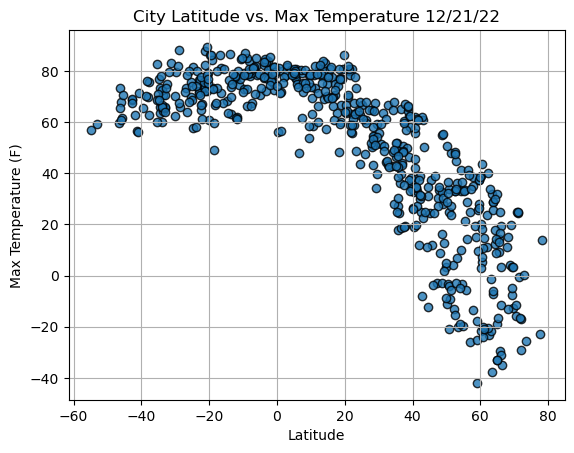

In [13]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

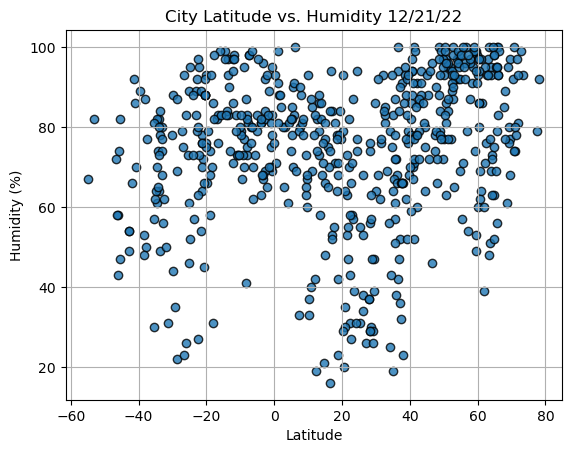

In [14]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

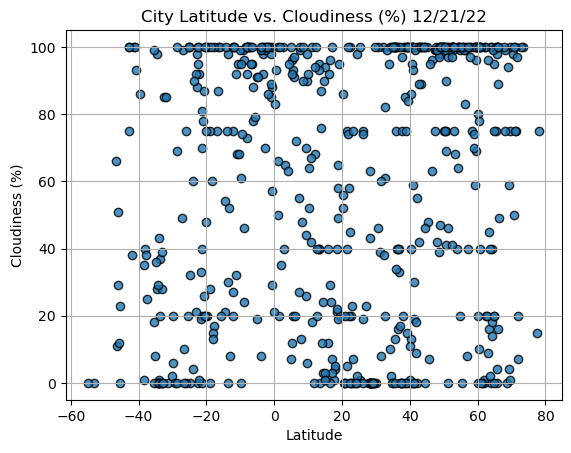

In [15]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()


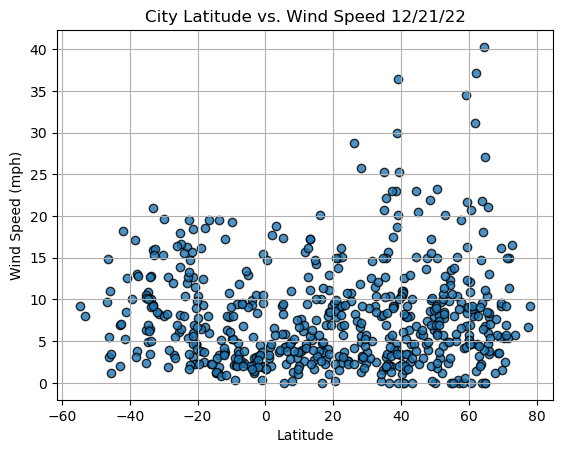

In [16]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()

In [17]:
# Import linregress
from scipy.stats import linregress

# Create a function to create perform linear regression on the weather data
# and plot a regression line and the equation with the data.
def plot_linear_regression(x_values, y_values, title, y_label, text_coordinates):

    # Run regression on hemisphere weather data.
    (slope, intercept, r_value, p_value, std_err) = linregress(x_values, y_values)

    # Calculate the regression line "y values" from the slope and intercept.
    regress_values = x_values * slope + intercept
    # Get the equation of the line.
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Create a scatter plot and plot the regression line.
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r")
    # Annotate the text for the line equation.
    plt.annotate(line_eq, text_coordinates, fontsize=15, color="red")
    plt.title(title)
    plt.xlabel('Latitude')
    plt.ylabel(y_label)
    plt.show()